In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('pacific.csv')



In [20]:
data.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [21]:
data.shape


(26137, 22)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26137 entries, 0 to 26136
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                26137 non-null  object
 1   Name              26137 non-null  object
 2   Date              26137 non-null  int64 
 3   Time              26137 non-null  int64 
 4   Event             26137 non-null  object
 5   Status            26137 non-null  object
 6   Latitude          26137 non-null  object
 7   Longitude         26137 non-null  object
 8   Maximum Wind      26137 non-null  int64 
 9   Minimum Pressure  26137 non-null  int64 
 10  Low Wind NE       26137 non-null  int64 
 11  Low Wind SE       26137 non-null  int64 
 12  Low Wind SW       26137 non-null  int64 
 13  Low Wind NW       26137 non-null  int64 
 14  Moderate Wind NE  26137 non-null  int64 
 15  Moderate Wind SE  26137 non-null  int64 
 16  Moderate Wind SW  26137 non-null  int64 
 17  Moderate Win

In [23]:
data['Status'].value_counts()

Status
 TS     10076
 TD      6965
 HU      6765
 LO      1828
 DB       217
 ET       152
 EX       110
 SS         7
 PT         6
 ST         6
 SD         4
 HU         1
Name: count, dtype: int64

In [24]:
data.isnull().sum()

ID                  0
Name                0
Date                0
Time                0
Event               0
Status              0
Latitude            0
Longitude           0
Maximum Wind        0
Minimum Pressure    0
Low Wind NE         0
Low Wind SE         0
Low Wind SW         0
Low Wind NW         0
Moderate Wind NE    0
Moderate Wind SE    0
Moderate Wind SW    0
Moderate Wind NW    0
High Wind NE        0
High Wind SE        0
High Wind SW        0
High Wind NW        0
dtype: int64

In [25]:
# Filter the dataset for specific 'Status' values
data = data[data['Status'].isin([' TD', ' TS', ' EX'])]

# Display the filtered data
print(data.head())


         ID                 Name      Date  Time Event Status Latitude  \
0  EP011949              UNNAMED  19490611     0           TS    20.2N   
1  EP011949              UNNAMED  19490611   600           TS    20.2N   
2  EP011949              UNNAMED  19490611  1200           TS    20.2N   
3  EP011949              UNNAMED  19490611  1800           TS    20.3N   
4  EP011949              UNNAMED  19490612     0           TS    20.4N   

  Longitude  Maximum Wind  Minimum Pressure  ...  Low Wind SW  Low Wind NW  \
0    106.3W            45              -999  ...         -999         -999   
1    106.4W            45              -999  ...         -999         -999   
2    106.7W            45              -999  ...         -999         -999   
3    107.7W            45              -999  ...         -999         -999   
4    108.6W            45              -999  ...         -999         -999   

   Moderate Wind NE  Moderate Wind SE  Moderate Wind SW  Moderate Wind NW  \
0        

In [26]:
data=data.dropna()

In [27]:
data=data.drop('Name',axis=1)
data=data.drop('Date',axis=1)

In [28]:

X = data.drop(['Status'], axis=1)  
y = data['Status']  

In [29]:
X.shape

(17151, 19)

In [30]:
y.value_counts()

Status
 TS    10076
 TD     6965
 EX      110
Name: count, dtype: int64

In [31]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns
print(numeric_cols)
print(categorical_cols)

Index(['Time', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW'],
      dtype='object')
Index(['ID', 'Event', 'Latitude', 'Longitude'], dtype='object')


In [32]:
print(X['Latitude'])

0        20.2N
1        20.2N
2        20.2N
3        20.3N
4        20.4N
         ...  
26115    10.9N
26116    11.2N
26117    11.5N
26118    11.8N
26130    20.7N
Name: Latitude, Length: 17151, dtype: object


In [33]:
X['Latitude'] = X['Latitude'].str.replace(r'[NSEW]', '', regex=True).astype(float)
X['Longitude'] = X['Longitude'].str.replace(r'[NSEW]', '', regex=True).astype(float)



In [34]:
categorical_cols = X.select_dtypes(include=['object']).columns

In [35]:
import pickle

# Dictionary to store label encoders for each categorical column
label_encoders = {}

# Apply LabelEncoder to each categorical column and save the encoder
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Save the encoder for the column

# Save the encoders to a file
with open('label_encoderC.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)

print("Label encoders saved successfully.")


Label encoders saved successfully.


In [36]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply SelectKBest with ANOVA F-value as the scoring function
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Get feature scores and names
feature_scores = selector.scores_
print(feature_scores)

# Get the mask of selected features
selected_mask = selector.get_support()

# Get the names of selected columns
selected_columns = X.columns[selected_mask]
print("Selected Feature Names:", selected_columns.tolist())


[1.58635076e+01 1.34918231e-01 2.67702827e-01 7.68877625e+02
 3.89649689e+01 1.71641537e+04 2.97267469e+00 4.07520180e+01
 3.84931303e+01 3.52896445e+01 3.87454176e+01 2.91085262e+01
 2.85887683e+01 2.79539567e+01 2.84936013e+01 2.69032897e+01
 2.69012633e+01 2.69012633e+01 2.69012633e+01]
Selected Feature Names: ['Latitude', 'Longitude', 'Maximum Wind', 'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind NW']


In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_selected)

with open('minmax_scalerC.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Scaler saved successfully.")


Scaler saved successfully.


In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("Class distribution after SMOTE:")
print(y_resampled.value_counts())


Class distribution after SMOTE:
Status
 TS    10076
 TD    10076
 EX    10076
Name: count, dtype: int64


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



# Assuming the target variable is named 'Status'
class_names = ['TD','TS','EX']

# Function to plot confusion matrix as a heatmap using class names from LabelEncoder
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title(title)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()



Random Forest Classifier:
Accuracy: 0.9920608666887198
Precision: 0.9920742894893969
Recall: 0.9920608666887198
F1 Score: 0.9920648439856841

Classification Report:
               precision    recall  f1-score   support

          EX       0.99      0.99      0.99      2017
          TD       1.00      0.99      1.00      2029
          TS       0.99      0.99      0.99      2000

    accuracy                           0.99      6046
   macro avg       0.99      0.99      0.99      6046
weighted avg       0.99      0.99      0.99      6046



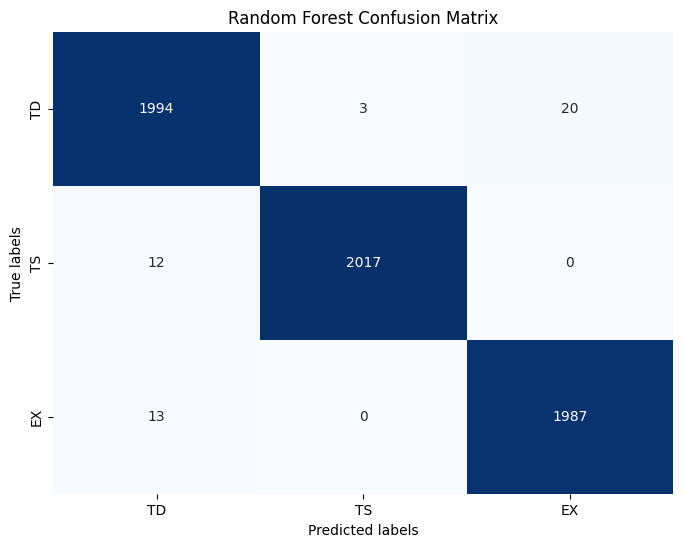

In [41]:

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, title="Random Forest Confusion Matrix")


Logistic Regression:
Accuracy: 0.8875289447568641
Precision: 0.8873609665496278
Recall: 0.8875289447568641
F1 Score: 0.8870548490557754

Classification Report:
               precision    recall  f1-score   support

          EX       0.85      0.82      0.84      2017
          TD       0.89      0.94      0.91      2029
          TS       0.92      0.90      0.91      2000

    accuracy                           0.89      6046
   macro avg       0.89      0.89      0.89      6046
weighted avg       0.89      0.89      0.89      6046



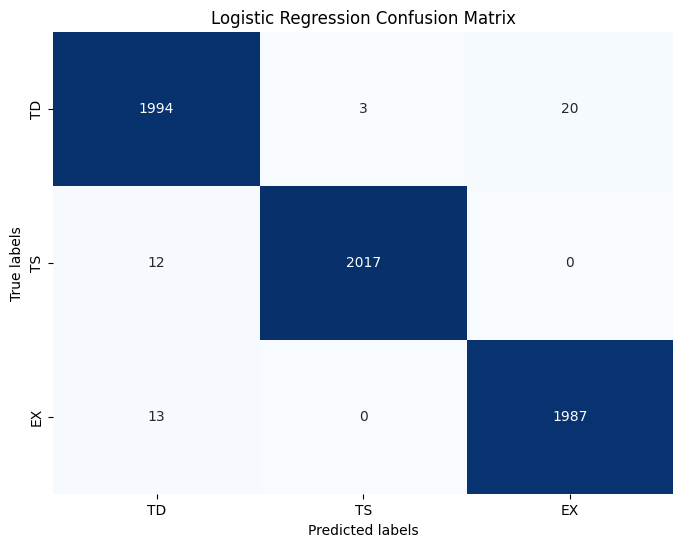

In [42]:
# %% Train and evaluate Logistic Regression
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate Logistic Regression
print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
plot_confusion_matrix(y_test, y_pred_rf, title="Logistic Regression Confusion Matrix")



Decision Tree Classifier:
Accuracy: 0.9905722791928547
Precision: 0.9905738068140508
Recall: 0.9905722791928547
F1 Score: 0.990571903015928

Classification Report:
               precision    recall  f1-score   support

          EX       0.99      0.99      0.99      2017
          TD       1.00      1.00      1.00      2029
          TS       0.99      0.99      0.99      2000

    accuracy                           0.99      6046
   macro avg       0.99      0.99      0.99      6046
weighted avg       0.99      0.99      0.99      6046



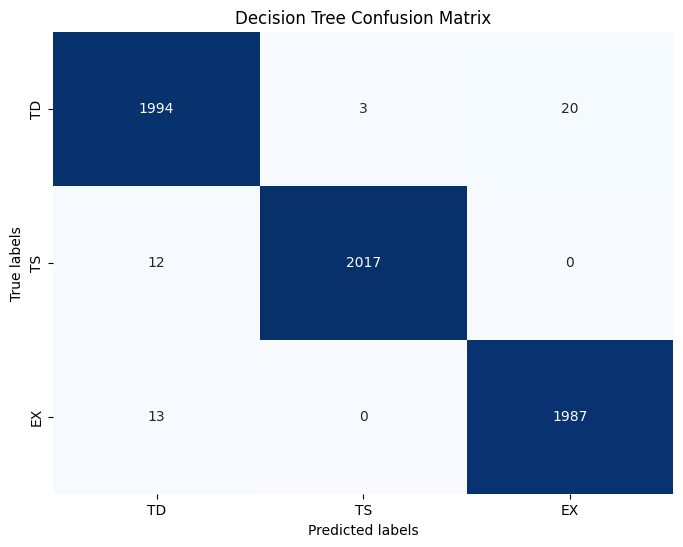

In [43]:
# %% Train and evaluate Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree
print("\nDecision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_dt, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
plot_confusion_matrix(y_test, y_pred_rf, title="Decision Tree Confusion Matrix")


In [44]:
with open('rfmodelC.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("Random Forest model saved successfully.")

Random Forest model saved successfully.
